<img src="https://raw.githubusercontent.com/pelaokano/inel_ML/main/Modulo4/logo_inel.png">

<h1 align="center">Machine Learning Aplicado a la Ingeniería Eléctrica</h1>

<h2 align="center">Ejercicio Regresión</h2>


###  Objetivo: predecir la generación fotovoltaica para el día siguiente de una comunidad energética local. Se utilizarán datos históricos de la variable target que queremos predecir (datos históricos de generación fotovoltaica) y de otros atributos (features) que pueden ayudar a predecir modelo.



## Recordatorio: proceso de creación de un modelo de Machine Learning

<img src="https://raw.githubusercontent.com/pelaokano/inel_ML/main/Modulo5/imagenes/creacion-modeloML.png" alt="Drawing" style="width: 800px;"/>



### Features/características 
* **localhour**: columna con la fecha y hora.
* **pressure**: Presión atmosférica [milibares]
* **temperature**: temperatura en [ºC].
* **humidity**: Humedad relativa [%].
* **windspeed**: Velocidad del viento en [m/s]
* **rain**: Lluvia [mm].
* **radiation**: irradiancia [W/m2]


### Target / etiqueta

* **pvgen**: generación fotovoltaica [kW]

<div class="alert alert-success">
    <b>Importar librerias</b>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-success">
    <b> Comprender los datos </b>
</div>


Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 


In [2]:
data = pd.read_excel('pvgen_data.xlsx')

In [3]:
data.shape

(25034, 8)

In [4]:
data.head(5)

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
0,2015-02-19 12:00:00,1024.4,17.0,56.0,4.0,0.0,672.0,6.646
1,2015-02-19 13:00:00,1022.8,18.0,47.0,4.0,0.0,865.0,7.364
2,2015-02-19 14:00:00,1021.4,19.0,47.0,NaN,0.0,781.0,7.418
3,2015-02-19 15:00:00,1019.9,20.0,41.0,NaN,0.0,664.0,6.616
4,2015-02-19 16:00:00,1018.6,21.0,42.0,4.0,0.0,505.0,4.795


In [5]:
data.tail(5)

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
25029,2018-05-01 19:00:00,1013.6,25.0,85.0,0.0,0.0,125.0,0.06
25030,2018-05-01 20:00:00,1014.0,24.0,84.0,0.0,0.0,2.0,0.00
25031,2018-05-01 21:00:00,1014.6,24.0,85.0,0.0,0.0,0.0,0.00
25032,2018-05-01 22:00:00,1015.3,24.0,86.0,0.0,0.0,0.0,0.00
25033,2018-05-01 23:00:00,1015.3,24.0,86.0,0.0,0.0,0.0,0.00


<div class="alert alert-success">
    <b>Tipos de datos</b>
</div>

In [8]:
data.dtypes

localhour      datetime64[ns]
pressure              float64
temperature           float64
humidity              float64
windspeed             float64
rain                  float64
radiation             float64
pvgen                 float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25034 entries, 0 to 25033
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   localhour    25034 non-null  datetime64[ns]
 1   pressure     25030 non-null  float64       
 2   temperature  25033 non-null  float64       
 3   humidity     25031 non-null  float64       
 4   windspeed    25031 non-null  float64       
 5   rain         25034 non-null  float64       
 6   radiation    25032 non-null  float64       
 7   pvgen        25034 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.5 MB


<div class="alert alert-success">
    <b>Resumen estadístico del conjunto de datos de entrada:</b>
</div>

<p>La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).</p>

In [10]:
data.describe()

,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
count,25030.000000,25033.000000,25031.000000,25031.000000,25034.000000,25032.000000,25034.000000
mean,1015.932381,21.415412,70.595621,1.432384,0.029356,177.629754,1.493409
std,6.258582,7.595223,19.502255,1.247824,0.462885,267.392486,2.241482
min,997.000000,-6.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,1011.800000,17.000000,56.000000,0.000000,0.000000,0.000000,0.000000
50%,1015.100000,22.000000,74.000000,1.000000,0.000000,3.000000,0.010000
75%,1019.500000,27.000000,88.000000,2.000000,0.000000,291.000000,2.550750
max,1045.500000,40.000000,98.000000,9.000000,32.800000,1101.000000,9.538000


<div class="alert alert-success">
    <b>Transformacion de datos</b>
</div>

In [11]:
data['fecha_hora']=pd.to_datetime(data['localhour'], '%Y-%m-%d %HH:%MM:%SS')

In [12]:
data.index=data['fecha_hora']
data.drop(['fecha_hora'], axis='columns', inplace=True)

In [13]:
data.head()

,localhour,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
fecha_hora,,,,,,,,
2015-02-19 12:00:00,2015-02-19 12:00:00,1024.4,17.0,56.0,4.0,0.0,672.0,6.646
2015-02-19 13:00:00,2015-02-19 13:00:00,1022.8,18.0,47.0,4.0,0.0,865.0,7.364
2015-02-19 14:00:00,2015-02-19 14:00:00,1021.4,19.0,47.0,NaN,0.0,781.0,7.418
2015-02-19 15:00:00,2015-02-19 15:00:00,1019.9,20.0,41.0,NaN,0.0,664.0,6.616
2015-02-19 16:00:00,2015-02-19 16:00:00,1018.6,21.0,42.0,4.0,0.0,505.0,4.795


<div class="alert alert-success">
    <b>Visualizar los datos</b>
</div>

<p>Una manera visual de entender los datos de entrada es mendiante la visualización de las siguientes gráficas.</p>


**Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

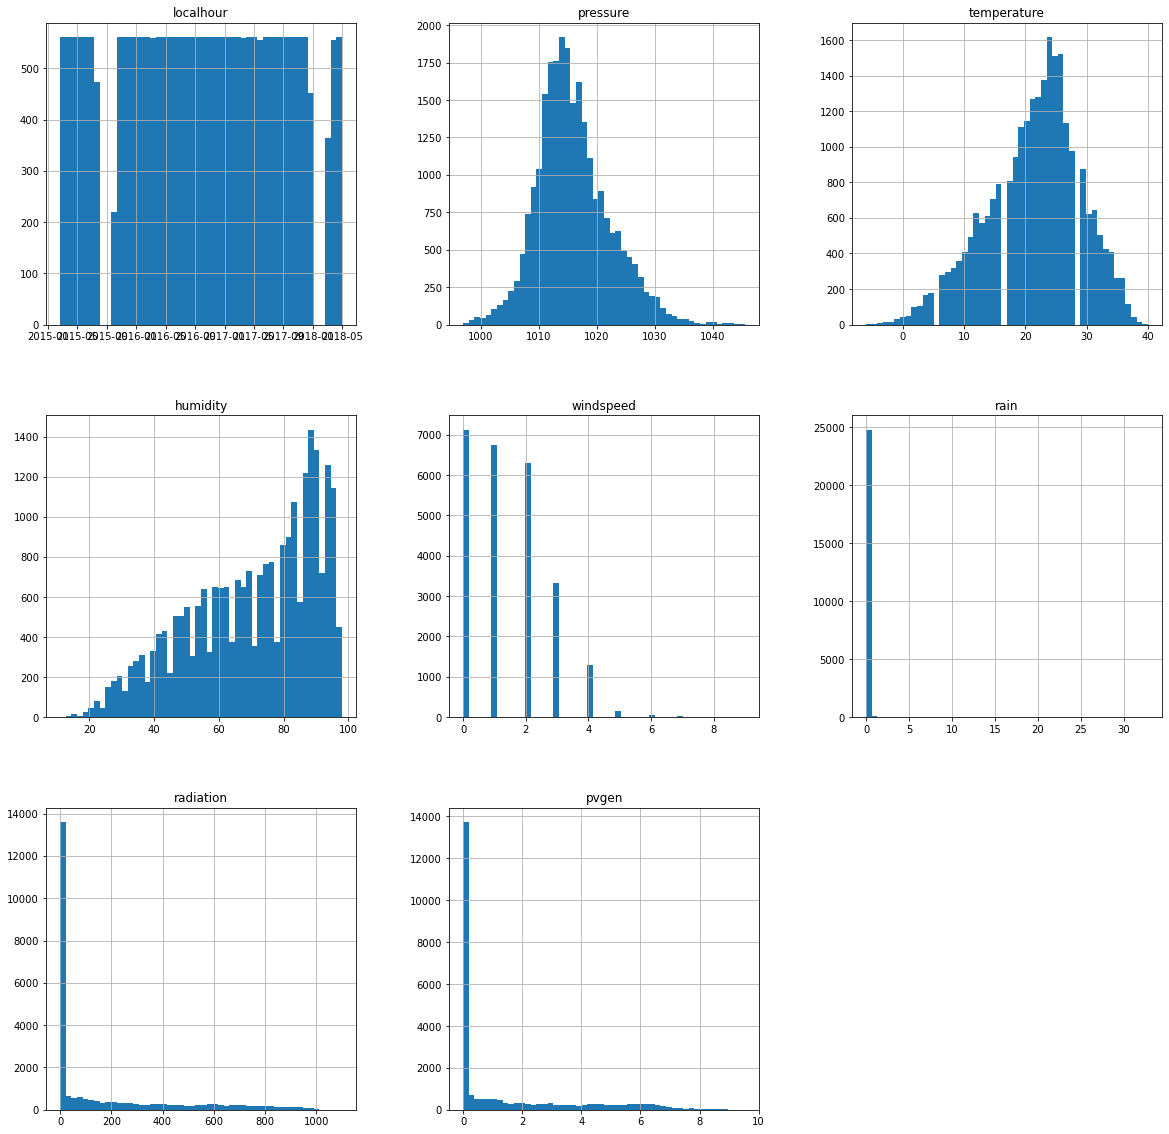

In [14]:
    ### Escribe aquí tu código ###
histograma=data.hist(xlabelsize=10, ylabelsize=10, bins=50,figsize=(20,20))

#el primer cuadro del histograma no tiene mucho sentido por que esta asociado la variable localhour (fecha)
# se podria generar un grafico sin dicha variable con el siguiente codigo:

#histograma=datailoc[:,1:].hist(xlabelsize=10, ylabelsize=10, bins=50,figsize=(20,20))

**Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

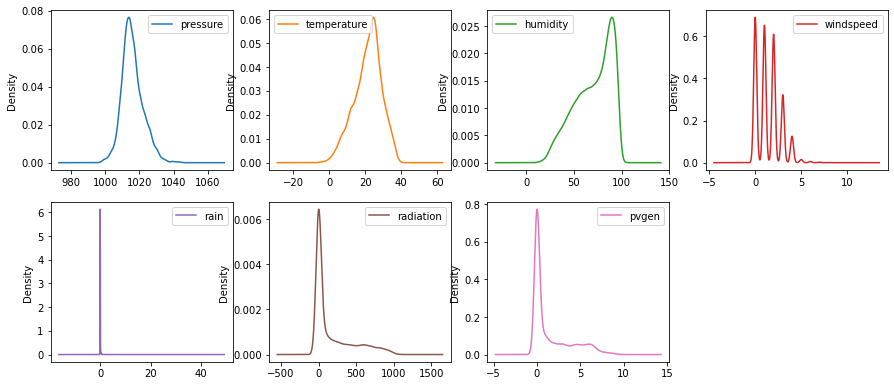

In [15]:
    ### Escribe aquí tu código ###
density = data.iloc[:,1:].plot(kind='kde', subplots=True, layout=(3, 4), figsize=(15, 10), sharex=False,sharey=False, fontsize=10)

**Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

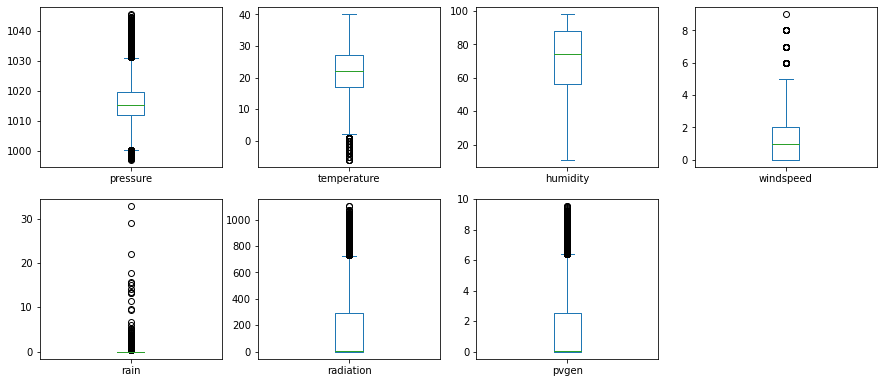

In [16]:
    ### Escribe aquí tu código ###
atributo_boxplots=data.plot(kind='box', subplots=True, layout=(3, 4), figsize=(15, 10), sharex=False,sharey=False, fontsize=10)

<div class="alert alert-success">
    <b>Matriz de correlación</b>
</div>


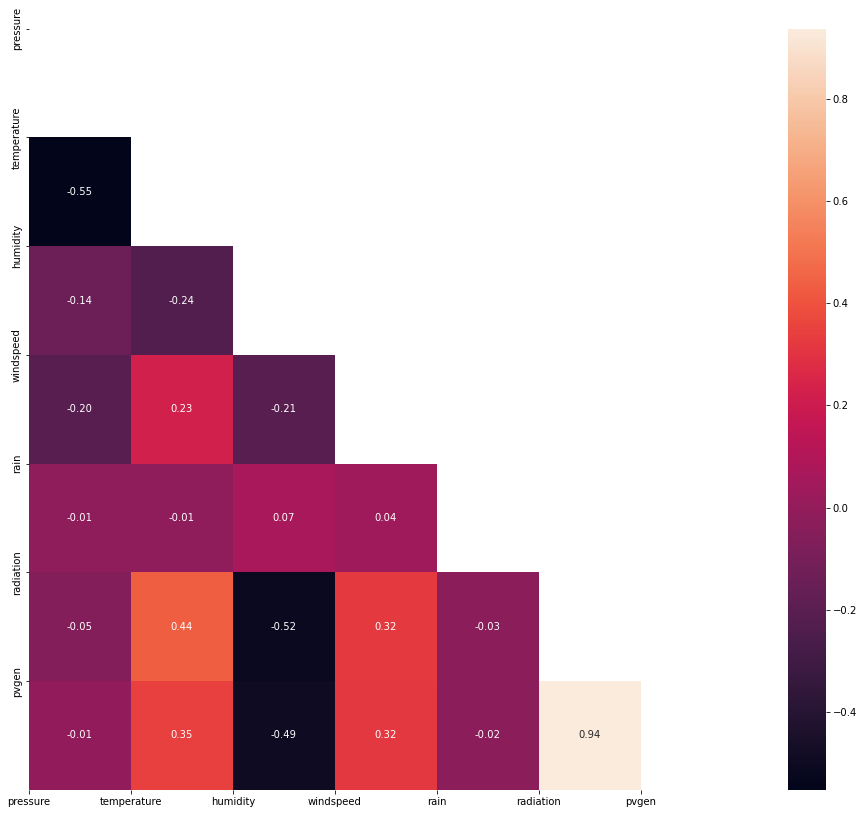

In [17]:
# Cálculo de coeficientes de correlación
corr = data.corr(method='pearson') 

# Quitar valores repetidos
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
  
# Matriz de correlación
f, ax = plt.subplots(figsize=(16, 14))
#Generar Heat Map,
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    # yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    # plot
plt.show()


In [18]:
corr

,pressure,temperature,humidity,windspeed,rain,radiation,pvgen
pressure,1.000000,-0.553161,-0.141123,-0.203778,-0.014473,-0.054256,-0.006204
temperature,-0.553161,1.000000,-0.235546,0.226809,-0.014077,0.435156,0.347312
humidity,-0.141123,-0.235546,1.000000,-0.208448,0.068095,-0.517637,-0.494982
windspeed,-0.203778,0.226809,-0.208448,1.000000,0.036508,0.322394,0.316717
rain,-0.014473,-0.014077,0.068095,0.036508,1.000000,-0.029142,-0.023935
radiation,-0.054256,0.435156,-0.517637,0.322394,-0.029142,1.000000,0.938233
pvgen,-0.006204,0.347312,-0.494982,0.316717,-0.023935,0.938233,1.000000


<div class="alert alert-success">
    <b>Preparar los datos</b>
</div>

<p>Eliminar features no necesarias, crear nuevas variables de entrada, etc. </p>

In [19]:
#La variable pressure tiene una correlación de -0.006204 con pvgen se borra del dataset por que la correlación es muy baja
#La variable rain tiene una correlación de -0.023935 con pvgen se borra del dataset por que la correlación es muy baja
data.drop(['pressure', 'rain'], axis=1, inplace=True)

In [20]:
data['hora']=data.index.hour
data['mes']=data.index.month
data['dia_semana']=data.index.day_of_week
data['dia_ano']=data.index.day_of_year

In [21]:
data.columns

Index(['localhour', 'temperature', 'humidity', 'windspeed', 'radiation',
       'pvgen', 'hora', 'mes', 'dia_semana', 'dia_ano'],
      dtype='object')

<div class="alert alert-success">
    <b>Vuelvo a correr la matriz de correlación</b>
</div>

<p>Se corre nuevamente la matriz de correlación dado que se agregaron nuevas columnas</p>

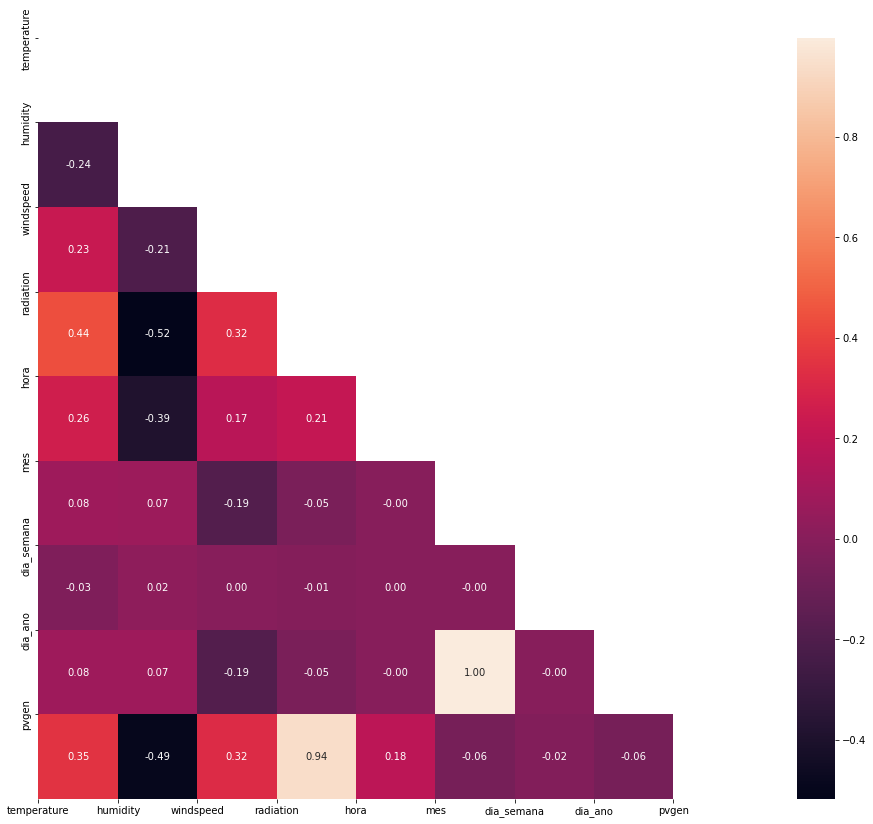

In [22]:
# Cálculo de coeficientes de correlación
corr = data[['localhour', 'temperature', 'humidity', 'windspeed', 'radiation'
             , 'hora', 'mes', 'dia_semana', 'dia_ano', 'pvgen']].corr(method='pearson') 

# Quitar valores repetidos
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
  
# Matriz de correlación
f, ax = plt.subplots(figsize=(16, 14))
#Generar Heat Map,
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    # yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    # plot
plt.show()

In [23]:
corr

,temperature,humidity,windspeed,radiation,hora,mes,dia_semana,dia_ano,pvgen
temperature,1.000000,-0.235546,0.226809,0.435156,0.261827,0.079221,-0.031198,0.077608,0.347312
humidity,-0.235546,1.000000,-0.208448,-0.517637,-0.393310,0.072863,0.024838,0.074493,-0.494982
windspeed,0.226809,-0.208448,1.000000,0.322394,0.170262,-0.190908,0.000644,-0.187878,0.316717
radiation,0.435156,-0.517637,0.322394,1.000000,0.214944,-0.047401,-0.012535,-0.048088,0.938233
hora,0.261827,-0.393310,0.170262,0.214944,1.000000,-0.000780,0.000274,-0.000935,0.181422
mes,0.079221,0.072863,-0.190908,-0.047401,-0.000780,1.000000,-0.000226,0.996379,-0.061635
dia_semana,-0.031198,0.024838,0.000644,-0.012535,0.000274,-0.000226,1.000000,-0.000216,-0.015301
dia_ano,0.077608,0.074493,-0.187878,-0.048088,-0.000935,0.996379,-0.000216,1.000000,-0.061702
pvgen,0.347312,-0.494982,0.316717,0.938233,0.181422,-0.061635,-0.015301,-0.061702,1.000000


In [24]:
#se observa que las variables dia_semana tiene una correlación de -0.015301 por tanto se elimna
data.drop(['dia_semana'], axis=1, inplace=True)

<div class="alert alert-success">
    <b>Si fuera necesario, tratar los missing data (eliminarlos/imputar valores)</b>
</div>

In [25]:
data.isna().sum()

localhour      0
temperature    1
humidity       3
windspeed      3
radiation      2
pvgen          0
hora           0
mes            0
dia_ano        0
dtype: int64

In [26]:
#se utiliza el siguiente codigo para rellenar los datos faltantes
data.fillna(method="ffill", inplace=True) 

In [27]:
data.shape

(25034, 9)

In [28]:
data.isna().sum()

localhour      0
temperature    0
humidity       0
windspeed      0
radiation      0
pvgen          0
hora           0
mes            0
dia_ano        0
dtype: int64

<div class="alert alert-success">
    <b>Dividir los datos</b>
</div>


<p>Dividir los datos en:</p>
<ol>
    <li>X_train, y_train, X_test, y_test</li>
    <li>X_val, y_val</li>
</ol>     

In [29]:
X=data[['temperature', 'humidity', 'windspeed', 'radiation','hora', 'mes', 'dia_ano']].copy()
y=data['pvgen'].copy()

In [30]:
X.shape

(25034, 7)

In [31]:
y.shape

(25034,)

In [32]:
X.head()

,temperature,humidity,windspeed,radiation,hora,mes,dia_ano
fecha_hora,,,,,,,
2015-02-19 12:00:00,17.0,56.0,4.0,672.0,12,2,50
2015-02-19 13:00:00,18.0,47.0,4.0,865.0,13,2,50
2015-02-19 14:00:00,19.0,47.0,4.0,781.0,14,2,50
2015-02-19 15:00:00,20.0,41.0,4.0,664.0,15,2,50
2015-02-19 16:00:00,21.0,42.0,4.0,505.0,16,2,50


In [33]:
y.head()

fecha_hora
2015-02-19 12:00:00    6.646
2015-02-19 13:00:00    7.364
2015-02-19 14:00:00    7.418
2015-02-19 15:00:00    6.616
2015-02-19 16:00:00    4.795
Name: pvgen, dtype: float64

In [34]:
# Dividir los datos en datos de entreno y validación
from sklearn.model_selection import train_test_split

test_size = 0.2  # porcentaje de los datos de entrada que utilizaré para validar el modelo

# Divido los datos en datos de entreno, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size ,shuffle=False)

<div class="alert alert-success">
    <b>Transformación (escalado) si fuera necesario</b>
</div>

<p>Si lo estimais oportuno, escalar los datos.</p>

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

X_test_scaled = scaler.transform(X_test)
X_test_scaled


array([[ 2.01829113, -1.56112103,  1.12109436, ...,  0.93932114,
         0.58938808,  0.48667599],
       [ 2.01829113, -1.40609805,  1.12109436, ...,  1.08380045,
         0.58938808,  0.48667599],
       [ 1.75615602, -1.04437774,  1.12109436, ...,  1.22827977,
         0.58938808,  0.48667599],
       ...,
       [ 0.31441292,  0.71254944, -1.35907613, ...,  1.37275908,
        -0.3181448 , -0.47329748],
       [ 0.31441292,  0.76422377, -1.35907613, ...,  1.51723839,
        -0.3181448 , -0.47329748],
       [ 0.31441292,  0.76422377, -1.35907613, ...,  1.66171771,
        -0.3181448 , -0.47329748]])

In [36]:
# Dividimos los datos en entreno (80%) y validación (15%)

val_size = 0.20  # porcentaje de los datos de entrada que utilizaré para validar el modelo

X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, 
                                                                test_size=val_size, random_state=0, shuffle=False)

<div class="alert alert-success">
    <b>Construcción y evaluación de modelos</b>
</div>



<p>Evalúa los algoritmos de regresión que estimes oportunos. Puedes buscar en la librería scikitlearn.</p>

<p>More info: https://scikit-learn.org/stable/supervised_learning.html</p>


In [37]:
# Importar librerías
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Establece el n_folds
num_folds = 10

# Guarda los resultados de las métricas de evaluación (MSE)

error_metrics='neg_mean_squared_error'
    
# Nombre de cada algoritmo
models = {('LR', LinearRegression()), 
          ('SVR', SVR()),
          ('RF', RandomForestRegressor())
         }

* **¿Cuál obtiene mejores resultados?** (gráfica que muestra el resultado de cada algoritmo).

Evaluation metric:  neg_mean_squared_error
Model  RF
Model  LR
Model  SVR
[('RF', -0.5141718982832493, 0.14958461872525183), ('LR', -0.6972483512329226, 0.2902209144844692), ('SVR', -0.4787999116518734, 0.1270845119804999)]


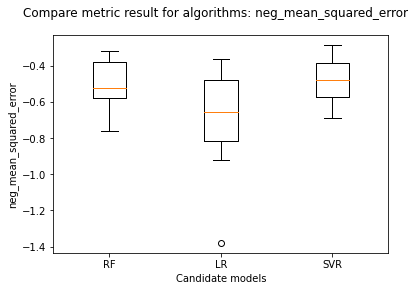

In [38]:
# importar librerías
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Imprime el resumen del método de cross-validation

results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation

# Entreno con validación cruzada

scoring=error_metrics
print('Evaluation metric: ', scoring)

for name, model in models:
    print('Model ', name)
    cross_validation = KFold(n_splits=num_folds, shuffle=False)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=cross_validation, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    resume = (name, cv_results.mean(), cv_results.std())
    msg.append(resume)
print(msg)

    
# Comparar resultados entre algoritmos
fig = plt.figure()
fig.suptitle('Compare metric result for algorithms: %s' %scoring)
ax = fig.add_subplot(111)
ax.set_xlabel('Candidate models')
ax.set_ylabel('%s' %scoring)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


<p>En este caso al los modelos SVR y Random Fores tienen resultados muy parecidos, pero dado que normalmente el algoritmo de Random Forest tiene mejor desempeño para series de tiempo, se utilizara dicho algoritmo para ajustara los hiperparametros</p>

<div class="alert alert-success">
    <b>Ajustar hiperparámetros</b>
</div>
<p>Definir los rangos de los hiperparámetros de búsqueda que estimes oportunos: params</p>

In [44]:
# Ajustar los hiperparámetros del algoritmo que os ha dado mejores resultados en el training

modelo = RandomForestRegressor()

params = { 
    'n_estimators': [200,400],
    'max_features': ['sqrt', 'log2'],
    #'max_depth' : [4,6,8]
}
scoring='neg_mean_squared_error'

cross_validation = KFold(n_splits=10, shuffle=False)
my_cv = cross_validation.split(X_val_scaled)
#gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)

gsearch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, scoring=scoring, cv=my_cv, verbose=2)
gsearch.fit(X_val_scaled, y_val)


params = gsearch.cv_results_['params']


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.3s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.5s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.3s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.7s
[CV] END ................max_features=sqrt, n_estimators=400; total time=   3.1s
[CV] END ................max_features=sqrt, n_es

In [45]:
print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Mejor resultado: -0.263546 utilizando los siguientes hiperparámetros {'max_features': 'log2', 'n_estimators': 200}


<div class="alert alert-success">
    <b>Evaluación final del modelo</b>
</div>



**Entrena el modelo con los hiperparámetros óptimos encontrados en el apartado anterior y realiza las predicciones.** 

In [46]:
# Entrena al modelo seleccionado con los hiperparámetros seleccionados y realiza las predicciones
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# modelo Random Forest
model = RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=200, random_state=18)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

**Utiliza una métrica que muestre el error obtenido (y_predict vs y_test)** (R2/MSE/RMSE...)

In [47]:
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest Mean r-squared: ", r2_score(y_test, y_pred))

Random Forest Mean Squared Error:  0.3611030978780867
Random Forest Mean Mean Absolute Error:  0.3248499990287497
Random Forest Mean r-squared:  0.9128942772566966


<div class="alert alert-success">
    <b>De los resultados obtenidos, muestra en una gráfica una semana cualquiera de predicción de generación fotovoltaica (y_predict) y datos reales (y_test)</b>
</div>


<p>Se grafican 168 que es la cantidad de horas en una semana, ya que cada predicción es equivalente a una hora</p>

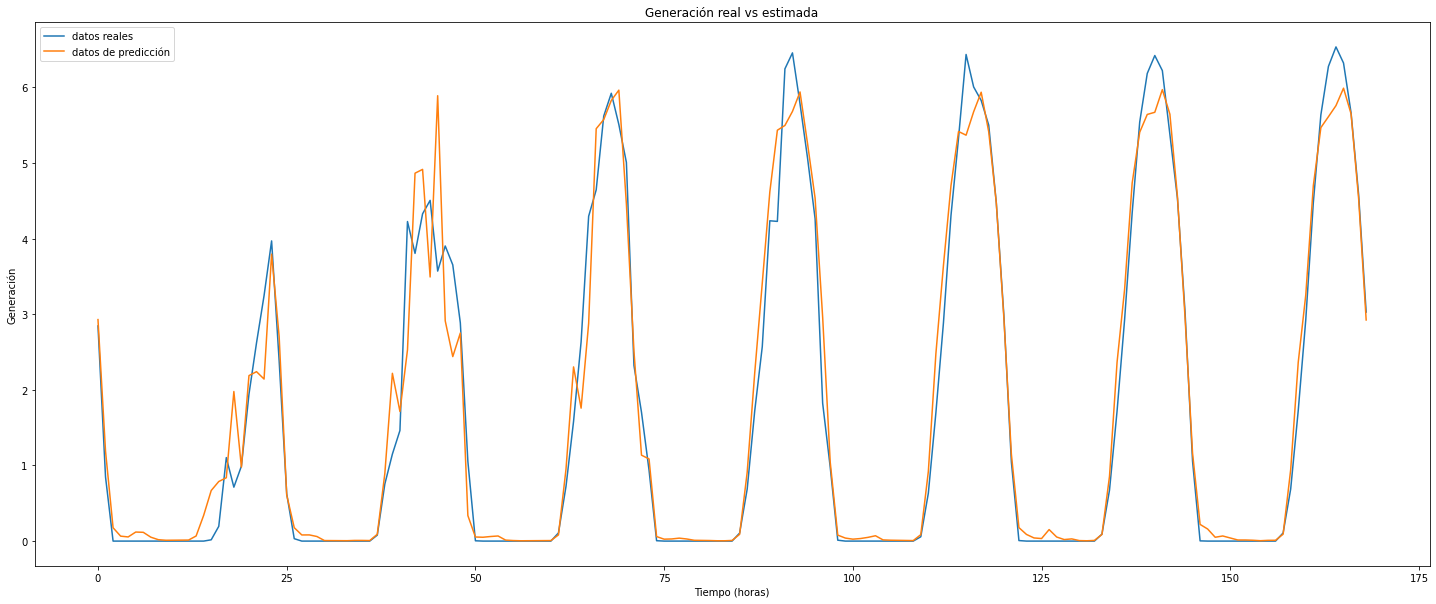

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
plt.plot(range(len(y_test[:169])),y_test[:169], label='datos reales')
plt.plot(range(len(y_pred[:169])),y_pred[:169], label='datos de predicción')

plt.title("Generación real vs estimada")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Generación")
plt.legend(loc="upper left")
plt.show()